In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [ ]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### EDA / Brainstorming

##### Data:
`Pclass`: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical

`Sex`: Sex | Categorical

`Age`: Age in years | Numerical (continuous)

`SibSp`: Number of siblings / spouses aboard the Titanic | Numerical (discrete)

`Parch`: Number of parents / children aboard the Titanic | Numerical (discrete)

`Ticket`: Ticket number

`Fare`: Passenger fare | Numerical (continuous)

`Cabin`: Cabin number | Alphanumeric (e.g. C52)

`Embarked`: Part of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton | Categorical

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. Harold Victor",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [ ]:
# Nulls in train_df features
pclass_null_train = train_df['Pclass'].isnull().sum()
sex_null_train = train_df['Sex'].isnull().sum()
age_null_train = train_df['Age'].isnull().sum()
sibsp_null_train = train_df['SibSp'].isnull().sum()
parch_null_train = train_df['Parch'].isnull().sum()
ticket_null_train = train_df['Ticket'].isnull().sum()
fare_null_train = train_df['Fare'].isnull().sum()
cabin_null_train = train_df['Cabin'].isnull().sum()
embarked_null_train = train_df['Embarked'].isnull().sum()

print("(Train)", "Pclass nulls:", pclass_null_train, "Sex nulls:",sex_null_train, "Age nulls:", age_null_train, 
        "SibSp nulls:", sibsp_null_train, "ParCh nulls:", parch_null_train, "Ticket nulls:", ticket_null_train,
        "Fare nulls:", fare_null_train, "Cabin nulls:", cabin_null_train, "Embarked nulls:", embarked_null_train)

(Train) Pclass nulls: 0 Sex nulls: 0 Age nulls: 177 SibSp nulls: 0 ParCh nulls: 0 Ticket nulls: 0 Fare nulls: 0 Cabin nulls: 687 Embarked nulls: 2


In [ ]:
# Nulls in test_df features
pclass_null_test = test_df['Pclass'].isnull().sum()
sex_null_test = test_df['Sex'].isnull().sum()
age_null_test = test_df['Age'].isnull().sum()
sibsp_null_test = test_df['SibSp'].isnull().sum()
parch_null_test = test_df['Parch'].isnull().sum()
ticket_null_train = test_df['Ticket'].isnull().sum()
fare_null_test = test_df['Fare'].isnull().sum()
cabin_null_test = test_df['Cabin'].isnull().sum()
embarked_null_test = test_df['Embarked'].isnull().sum()

print("(Test)", "Pclass nulls:", pclass_null_test, "Sex nulls:",sex_null_test, "Age nulls:", age_null_test,
        "SibSp nulls:", sibsp_null_test, "ParCh nulls:", parch_null_test, "Ticket nulls:", ticket_null_train,
        "Fare nulls:", fare_null_test, "Cabin nulls:", cabin_null_test, "Embarked nulls:", embarked_null_test)

(Test) Pclass nulls: 0 Sex nulls: 0 Age nulls: 86 SibSp nulls: 0 ParCh nulls: 0 Ticket nulls: 0 Fare nulls: 1 Cabin nulls: 327 Embarked nulls: 0


Features that contain nulls:

- Training data: Cabin (687) -> Age (177) -> Embarked (2)

- Test data: Cabin (327) -> Age (86) -> Fare (1)

#### Pclass:

Takeaway -> Pclass = 1 and Survived are highly correlated: first class passengers are more likely to survive

Very viable for final model - need to one-hot encode

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Sex:

Takeaway -> Females and Survived are highly correlated: female passengers are more likely to survive

Very viable for final model - need to one-hot encode

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Age:

Takeaway -> Large % of ~15-30 year olds didn't survive, but there is a decent survival rate for that same bucket

Need to impute nulls, maybe even create buckets? Good for final model

(29.69911764705882,
 0    24.0
 dtype: float64,
 28.0)

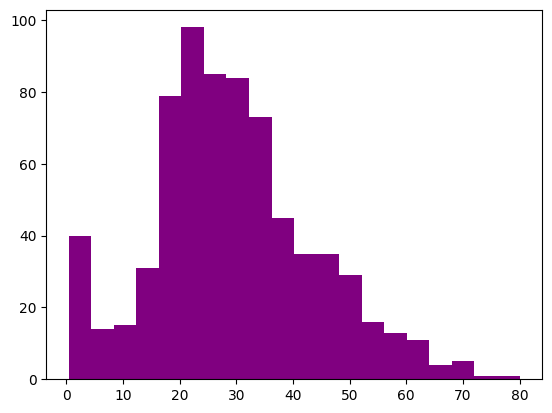

In [ ]:
plt.hist(train_df['Age'], bins=20, color='purple')
train_df['Age'].mean(), train_df['Age'].mode(), train_df['Age'].median()

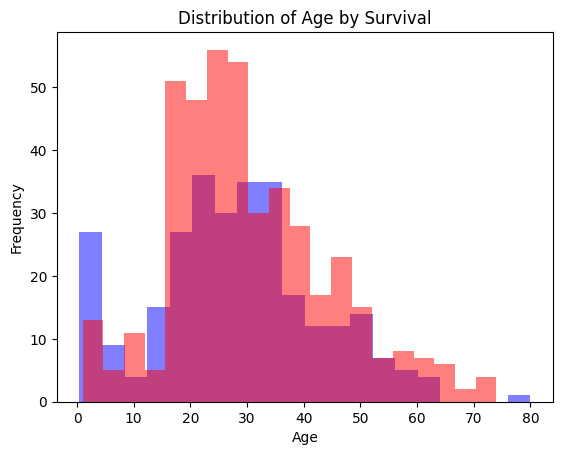

In [ ]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

plt.hist(survived['Age'], bins=20, alpha=0.5, label='Survived', color='blue')
plt.hist(not_survived['Age'], bins=20, alpha=0.5, label='Not Survived', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival')
plt.show()

In [ ]:
# age_bins = [0, 5, 18, 30, 45, 60, float('inf')]
# age_labels = ['Infant', 'Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']

# train_copy = train_df
# train_copy['Age Groups'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)
# train_copy[['Age Groups', 'Survived']].groupby(['Age Groups'], as_index=False).mean()

#### SibSp:

Takeaway -> Those with 1 or 2 siblings are most likely to survive

Maybe create buckets? 0 = Only, 1-2 = Few, 3-4 = Decent, 5-8 = Many

In [ ]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### ParCh:

Takeaway -> Those with 1-3 parents or children are most likely to survive

Again maybe create buckets? 0 = Alone, 1-3 = Decent, 4-6 = Large

In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


#### Ticket:

Takeaway -> ummmmm this is a mess

Let's not use this one 🤡

#### Fare:

Takeaway -> Those who have cheaper fare (i.e. lower class, presumably) were most likely to not survive

Again maybe create buckets?

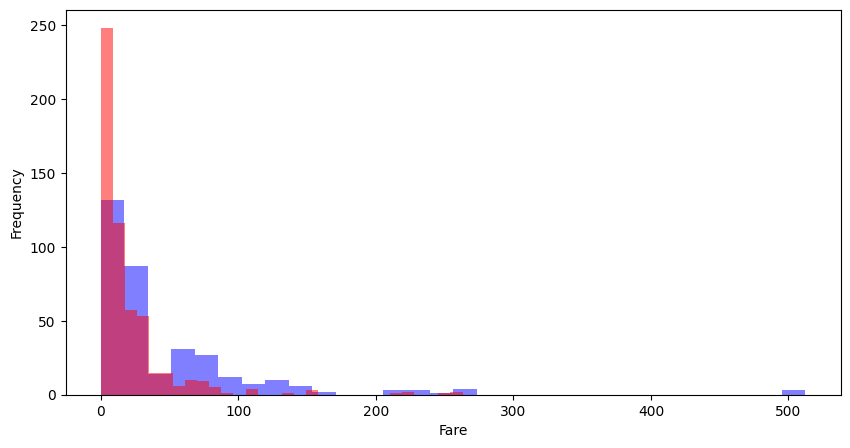

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(survived['Fare'], bins=30, alpha=0.5, color='blue')
plt.hist(not_survived['Fare'], bins=30, alpha=0.5, color='red')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#### Cabin:

Takeaway -> :( wish there were less null values; extracted cabin levels and checked survival rate

Some suspicious rates and too many nulls, idk if it's worth it 😭

In [ ]:
cabin_no_nulls = train_df.dropna(subset=['Cabin'])
cabin_no_nulls['Cabin Letters'] = cabin_no_nulls['Cabin'].str.extract(r'([A-Z]{1})')
cabin_with_letters = cabin_no_nulls[['Cabin', 'Cabin Letters', 'Survived']]
cabin_with_letters[['Cabin Letters', 'Survived']].groupby(['Cabin Letters'], as_index=False).mean()

/tmp/ipykernel_1681/3518362083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_no_nulls['Cabin Letters'] = cabin_no_nulls['Cabin'].str.extract(r'([A-Z]{1})')


,Cabin Letters,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000


#### Embarked:

Takeaway -> Those who embarked from C had the highest survival chance

Impute nulls with mode, use in final model

In [ ]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Feature Engineering

##### **Chosen features (training):**
0. `Name` (DROP)
1. `Pclass` (no nulls, no need for imputation -> one-hot encode)
2. `Sex` (no nulls, no need for imputation -> one-hot encode)
3. `Age` (impute nulls with median because distribution of Age is slightly skewed right)
4. `SibSp` (no nulls, no need for imputation -> create new feature `Family Size` based on adding `SibSp` + `ParCh` + 1 to account for the given passenger)
5. `ParCh` (no nulls, no need for imputation -> create new feature `Family Size` based on adding `SibSp` + `ParCh` + 1 to account for the given passenger)
6. `Ticket` (DROP)
7. `Fare` (standardize by z-score)
8. `Cabin` (DROP)
9. `Embarked` (impute nulls with mode -> one-hot encode)

In [ ]:
train_copy = train_df
train_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_copy = test_df
test_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Drop Features 0, 6, 8: 'Name', 'Ticket', and 'Cabin'
train_copy = train_copy.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_copy = test_copy.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [ ]:
# Feature 3: Impute 'Age' nulls with median Age
train_age_median = train_copy['Age'].median()
train_copy['Age'] = train_copy['Age'].fillna(train_age_median)

test_age_median = test_copy['Age'].median()
test_copy['Age'] = test_copy['Age'].fillna(test_age_median)

# age_bins = [0, 18, 30, 45, 60, float('inf')]
# age_labels = ['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']

# train_copy['Age Groups'] = pd.cut(train_copy['Age'], bins=age_bins, labels=age_labels, right=False)
# test_copy['Age Groups'] = pd.cut(test_copy['Age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
# Feature 9: Impute 'Embarked' nulls with mode
train_embarked_mode = train_copy['Embarked'].mode()[0]
train_copy['Embarked'] = train_copy['Embarked'].fillna(train_embarked_mode)

test_embarked_mode = test_copy['Embarked'].mode()[0]
test_copy['Embarked'] = test_copy['Embarked'].fillna(test_embarked_mode)

In [ ]:
# Features 4 and 5: Create new feature called Family Size using 'SibSp' and 'ParCh'
train_copy['Family Size'] = train_copy['SibSp'] + train_copy['Parch'] + 1
test_copy['Family Size'] = test_copy['SibSp'] + test_copy['Parch'] + 1

In [ ]:
# # Feature 4: Create buckets for 'SibSp' based on EDA
# # 0 = Only, 1-2 = Few, 3-4 = Decent, 5-8 = Many
# sibsp_bins = [0, 1, 3, 5, float('inf')]
# sibsp_labels = ['Only', 'Few', 'Decent', 'Many']

# train_copy['SibSp Groups'] = pd.cut(train_copy['SibSp'], bins=sibsp_bins, labels=sibsp_labels, right=False)
# test_copy['SibSp Groups'] = pd.cut(test_copy['SibSp'], bins=sibsp_bins, labels=sibsp_labels, right=False)

In [ ]:
# Feature 5: Create buckets for 'ParCh' based on EDA
# 0 = Alone, 1-3 = Decent, 4-6 = Large
# parch_bins = [0, 1, 4, float('inf')]
# parch_labels = ['Alone', 'Decent', 'Large']

# train_copy['Parch Groups'] = pd.cut(train_copy['Parch'], bins=parch_bins, labels=parch_labels, right=False)
# test_copy['Parch Groups'] = pd.cut(test_copy['Parch'], bins=parch_bins, labels=parch_labels, right=False)

In [ ]:
# Feature 7: standardize fare with z-score
train_copy['Fare_Zscore'] = (train_copy['Fare'] - np.mean(train_copy['Fare'])) / np.std(train_copy['Fare'])

test_copy['Fare'] = test_copy['Fare'].fillna(test_copy['Fare'].median())
test_copy['Fare_Zscore'] = (test_copy['Fare'] - np.mean(test_copy['Fare'])) / np.std(test_copy['Fare'])

In [ ]:
# Features 1, 2, 4, 5, 9: one-hot encoding Pclass, Sex, Family Size, Embarked
train_encoded = pd.get_dummies(train_copy, columns=['Pclass', 'Sex', 'Family Size', 'Embarked'])
train_encoded

,PassengerId,Survived,Age,SibSp,Parch,Fare,Fare_Zscore,Pclass_1,Pclass_2,Pclass_3,...,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_11,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,-0.502445,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0.786845,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,-0.488854,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0.420730,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,-0.486337,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,-0.386671,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,19.0,0,0,30.0000,-0.044381,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,28.0,1,2,23.4500,-0.176263,0,0,1,...,0,1,0,0,0,0,0,0,0,1
889,890,1,26.0,0,0,30.0000,-0.044381,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Features 1, 2, 4, 5, 9: one-hot encoding Pclass, Sex, Family Size, Embarked
test_encoded = pd.get_dummies(test_copy, columns=['Pclass', 'Sex', 'Family Size', 'Embarked'])
test_encoded

,PassengerId,Age,SibSp,Parch,Fare,Fare_Zscore,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Family Size_3,Family Size_4,Family Size_5,Family Size_6,Family Size_7,Family Size_8,Family Size_11,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,-0.497413,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,893,47.0,1,0,7.0000,-0.512278,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,894,62.0,0,0,9.6875,-0.464100,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,27.0,0,0,8.6625,-0.482475,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,896,22.0,1,1,12.2875,-0.417492,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,-0.493455,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,39.0,0,0,108.9000,1.314435,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
415,1307,38.5,0,0,7.2500,-0.507796,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,27.0,0,0,8.0500,-0.493455,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Selection

In [ ]:
X = train_encoded.drop(['PassengerId', 'Survived', 'SibSp', 'Parch', 'Fare'], axis=1)
y = train_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 19) (179, 19)
(712,) (179,)


In [ ]:
# CAUTION: DON'T TOUCH - splitting test data
real_X_test = test_encoded
real_X_test = real_X_test.drop(['PassengerId', 'SibSp', 'Parch', 'Fare'], axis=1)
print(real_X_test.columns)
print(X_test.columns)

Index(['Age', 'Fare_Zscore', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Family Size_1', 'Family Size_2', 'Family Size_3',
       'Family Size_4', 'Family Size_5', 'Family Size_6', 'Family Size_7',
       'Family Size_8', 'Family Size_11', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
Index(['Age', 'Fare_Zscore', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Family Size_1', 'Family Size_2', 'Family Size_3',
       'Family Size_4', 'Family Size_5', 'Family Size_6', 'Family Size_7',
       'Family Size_8', 'Family Size_11', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


### k-Fold Cross Validation

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

#### Neural Network

In [ ]:
# Training neural network on train-test split
nn = MLPClassifier(
    hidden_layer_sizes=(30),
    activation='logistic',
    solver='lbfgs',
    random_state=42
)

# nn.fit(X_train, y_train)
# y_pred_nn = nn.predict(X_test)
# accuracy_score_nn = accuracy_score(y_test, y_pred_nn)
# print("Accuracy:", accuracy_score_nn)

nn_score = cross_val_score(nn, X, y, cv=k_fold, scoring='accuracy')
print(nn_score)

# Average kNN score
np.mean(nn_score) * 100

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (

81.81273408239701

#### Logistic Regression

In [ ]:
lreg = LogisticRegression(solver='liblinear')

# lreg.fit(X_train, y_train)
# y_pred_lreg = lreg.predict(X_test)
# accuracy_score_lreg = accuracy_score(y_test, y_pred_lreg)
# print("Accuracy:", accuracy_score_lreg)

lreg_score = cross_val_score(lreg, X, y, cv=k_fold, scoring='accuracy')
print(lreg_score)

# Average kNN score
np.mean(lreg_score) * 100

[0.83333333 0.76404494 0.79775281 0.78651685 0.84269663 0.85393258
 0.79775281 0.76404494 0.7752809  0.8988764 ]


81.14232209737828

#### kNN

In [ ]:
knn = KNeighborsClassifier()

# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
# print("Accuracy:", accuracy_score_knn)

knn_score = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')
print(knn_score)

# Average kNN score
np.mean(knn_score) * 100

[0.85555556 0.74157303 0.74157303 0.75280899 0.78651685 0.84269663
 0.73033708 0.84269663 0.73033708 0.84269663]


78.66791510611736

In [ ]:
# # Fitting and testing decision tree on test.csv
# knn.fit(X_train, y_train)
# knn_preds = knn.predict(real_X_test)
# knn_preds

#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

dt_score = cross_val_score(dt, X, y, cv=k_fold, scoring='accuracy')
print(dt_score)

# Average kNN score
np.mean(dt_score) * 100

[0.77777778 0.76404494 0.78651685 0.75280899 0.7752809  0.79775281
 0.70786517 0.83146067 0.75280899 0.78651685]


77.32833957553058

In [ ]:
# Fitting and testing decision tree on test.csv
# dt.fit(X_train, y_train)
# dt_preds = dt.predict(real_X_test)
# dt_preds

#### Random Forest

In [ ]:
rf = RandomForestClassifier()

# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
# print("Accuracy:", accuracy_score_rf)

rf_score = cross_val_score(rf, X, y, cv=k_fold, scoring='accuracy')
print(rf_score)

# Average kNN score
np.mean(rf_score) * 100

[0.82222222 0.83146067 0.74157303 0.76404494 0.84269663 0.78651685
 0.75280899 0.7752809  0.76404494 0.84269663]


79.23345817727841

#### SVM


In [ ]:
svc = SVC()
svc_score = cross_val_score(svc, X, y, cv=k_fold, scoring='accuracy')
print(svc_score)

# Average kNN score
np.mean(svc_score) * 100

[0.65555556 0.59550562 0.60674157 0.73033708 0.6741573  0.70786517
 0.64044944 0.69662921 0.53932584 0.75280899]


65.99375780274656

### Modeling

In [ ]:
# Optimizing neural network hyperparameters
nn_param_grid = {
    'hidden_layer_sizes': [(2,), (5,), (10,)],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.00001],
}

nn_grid_search = GridSearchCV(nn, nn_param_grid, cv=5, scoring='accuracy')
nn_grid_search.fit(X_train, y_train)

nn_best_params = nn_grid_search.best_params_
print('Best Neural Network parameters found:\n', nn_best_params)

nn_optimized = MLPClassifier(max_iter=300, **nn_best_params, random_state=42)
nn_optimized.fit(X_train, y_train)
nn_accuracy = nn_optimized.score(X_test, y_test)
print(nn_accuracy)

nn_preds = nn_optimized.predict(real_X_test)
nn_preds

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/li

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Optimizing logistic regression hyperparameters
lreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}

lreg_grid_search = GridSearchCV(lreg, lreg_param_grid, cv=5, scoring='accuracy')
lreg_grid_search.fit(X_train, y_train)

lreg_best_params = lreg_grid_search.best_params_
print('Best logistic regression parameters found:\n', lreg_best_params)

lreg_optimized = LogisticRegression(**lreg_best_params, random_state=42)
lreg_optimized.fit(X_train, y_train)
lreg_accuracy = lreg_optimized.score(X_test, y_test)
print(lreg_accuracy)

lreg_preds = lreg_optimized.predict(real_X_test)
lreg_preds

Best logistic regression parameters found:
 {'C': 10}
0.7988826815642458
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Optimizing kNN hyperparameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

knn_best_params = knn_grid_search.best_params_
print('Best kNN parameters found:\n', knn_best_params)

knn_optimized = KNeighborsClassifier(**knn_best_params)
knn_optimized.fit(X_train, y_train)
knn_accuracy = knn_optimized.score(X_test, y_test)
print(knn_accuracy)

knn_preds = knn_optimized.predict(real_X_test)
knn_preds

Best kNN parameters found:
 {'n_neighbors': 3}
0.8212290502793296


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
# Optimizing decision tree hyperparameters
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

dt_best_params = dt_grid_search.best_params_
print('Best Decision Tree parameters found:\n', dt_best_params)

dt_optimized = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_optimized.fit(X_train, y_train)
dt_accuracy = dt_optimized.score(X_test, y_test)
print(dt_accuracy)

dt_preds = knn_optimized.predict(real_X_test)
dt_preds

Best Decision Tree parameters found:
 {'max_depth': 10, 'min_samples_split': 5}
0.8044692737430168


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
# Optimizing random forest hyperparameters
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'n_estimators': [100, 200, 300]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
print('Best Random Forest parameters found:\n', rf_best_params)

rf_optimized = RandomForestClassifier(**rf_best_params, random_state=42)
rf_optimized.fit(X_train, y_train)
rf_accuracy = rf_optimized.score(X_test, y_test)
print(rf_accuracy)

rf_preds = rf_optimized.predict(real_X_test)
rf_preds

Best Random Forest parameters found:
 {'bootstrap': True, 'max_depth': 90, 'n_estimators': 100}
0.8156424581005587


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Optimizing SVC hyperparameters
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)

svc_best_params = svc_grid_search.best_params_
print('Best SVC parameters found:\n', svc_best_params)

svc_optimized = SVC(**svc_best_params, random_state=42)
svc_optimized.fit(X_train, y_train)
svc_accuracy = svc_optimized.score(X_test, y_test)
print(svc_accuracy)

svc_preds = svc_optimized.predict(real_X_test)
svc_preds

Best SVC parameters found:
 {'C': 1, 'kernel': 'linear'}
0.7932960893854749


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Testing w/ ensemble classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_optimized), 
        ('dt', dt_optimized), 
        # ('lreg', lreg_optimized),
        # ('nn', nn_optimized)
        # ('svc', svc_optimized),
        ('knn', knn_optimized)
        ],
    voting='hard')
    
ensemble_classifier.fit(X_train, y_train)

y_pred = ensemble_classifier.predict(real_X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Based on the results after k-fold cross validation and modeling, we chose an ensemble method consisting of kNN and Random Forest as our final model for our best score.

In [ ]:
final_submission = pd.DataFrame(
    {'PassengerId': test_df['PassengerId'],
    'Survived': y_pred}
)
final_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3109894b-a154-4317-abe3-3e5dd00a080c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>